In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Create Features and it's Labels

In [2]:
X = torch.arange(start=0, end=50, step=0.5).unsqueeze(dim=1)
weight = 0.7
bias = 0.3
y = weight * X + bias

## Split data into train and test dataset

In [3]:
split = int(0.8*len(X))
train_features, train_labels = X[:split], y[:split]
test_features, test_labels = X[split:], y[split:]

print(f"Total features N = {len(X)} \nN_train = {len(train_features)} \nN_test = {len(test_features)}")

Total features N = 100 
N_train = 80 
N_test = 20


## Data visualization

In [4]:
def visualize(train_features,
              train_labels,
              test_features,
              test_labels,
              prediction=None):
    plt.figure(figsize=(4,4))
    plt.xlabel("Features")
    plt.ylabel("Labels")
    plt.scatter(train_features, train_labels, s=3, c='b', label='Train')
    plt.scatter(test_features, test_labels, s=3, c='g', label='Test')
    if prediction is not None:
        plt.scatter(test_features, prediction, s=3, c='r', label='Prediction')
    plt.legend(prop={"size": 10})

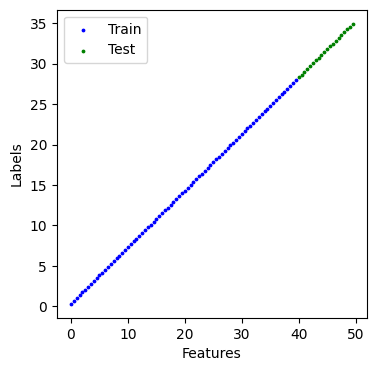

In [5]:
visualize(train_features=train_features,
          train_labels=train_labels,
          test_features=test_features,
          test_labels=test_labels)

## Build Model

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, X : torch.Tensor):
        return self.linear_layer(X)

In [7]:
model = LinearRegressionModel()

In [8]:
torch.manual_seed(42)
with torch.inference_mode():
    y_pred = model(test_features)

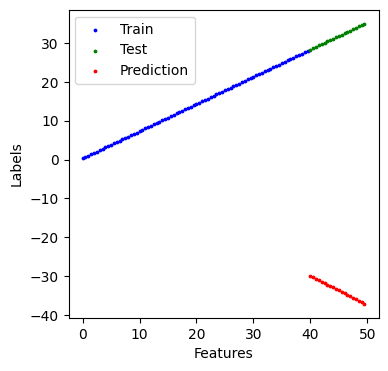

In [9]:
visualize(train_features=train_features,
          train_labels=train_labels,
          test_features=test_features,
          test_labels=test_labels,
          prediction=y_pred)

## Train Model

In [10]:
from tqdm import tqdm

def train_model(train_features : torch.Tensor,
                train_labels : torch.Tensor,
                model : torch.nn.Module,
                loss_fn : torch.nn.functional,
                optimizer : torch.optim):
    model.train()
    train_pred = model(train_features)
    train_loss = loss_fn(train_labels, train_pred)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    print(f"Train_loss : {train_loss :.3f}")


def eval_model(test_features : torch.Tensor,
               test_labels : torch.Tensor,
               model : torch.nn.Module,
               loss_fn : torch.nn.functional):
    model.eval()
    with torch.inference_mode():
        test_pred = model(test_features)
        test_loss = loss_fn(test_labels, test_pred)
    print(f"Test_loss : {test_loss :.3f}")

In [11]:
from tqdm import tqdm
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr= 0.001)

for epoch in tqdm(range(100)):
    print(f"------------------------------------\nEpoch : {epoch}")
    train_model(train_features=train_features,
                train_labels=train_labels,
                model=model,
                loss_fn=loss_fn,
                optimizer=optimizer)
    eval_model(test_features=test_features,
               test_labels=test_labels,
               model=model,
               loss_fn=loss_fn)

100%|██████████| 100/100 [00:00<00:00, 4424.00it/s]

------------------------------------
Epoch : 0
Train_loss : 28.649
Test_loss : 64.238
------------------------------------
Epoch : 1
Train_loss : 28.258
Test_loss : 63.353
------------------------------------
Epoch : 2
Train_loss : 27.867
Test_loss : 62.468
------------------------------------
Epoch : 3
Train_loss : 27.476
Test_loss : 61.583
------------------------------------
Epoch : 4
Train_loss : 27.085
Test_loss : 60.699
------------------------------------
Epoch : 5
Train_loss : 26.694
Test_loss : 59.814
------------------------------------
Epoch : 6
Train_loss : 26.303
Test_loss : 58.929
------------------------------------
Epoch : 7
Train_loss : 25.912
Test_loss : 58.044
------------------------------------
Epoch : 8
Train_loss : 25.521
Test_loss : 57.159
------------------------------------
Epoch : 9
Train_loss : 25.130
Test_loss : 56.275
------------------------------------
Epoch : 10
Train_loss : 24.739
Test_loss : 55.390
------------------------------------
Epoch : 11
Train

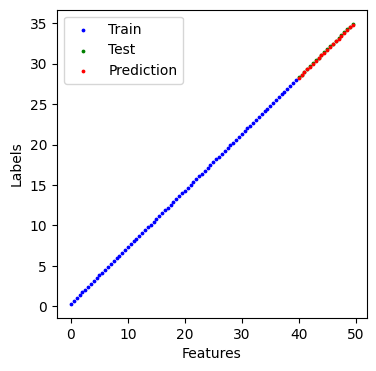

In [12]:
torch.manual_seed(42)
with torch.inference_mode():
    y_pred = model(test_features)


visualize(train_features=train_features,
          train_labels=train_labels,
          test_features=test_features,
          test_labels=test_labels,
          prediction=y_pred)

## Save/Load model's Parameters for Inference

In [13]:
from pathlib import Path

# save model's parameteras
model_path = Path("models")
model_path.mkdir(parents=True,
                exist_ok=True)
model_name = "LinearRegressionModel.pt"
model_save_path = model_path/model_name

torch.save(obj=model.state_dict(),
           f=model_save_path)

In [14]:
# load model's parameters
model_new = LinearRegressionModel()
model_new.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [15]:
model_new.state_dict() == model.state_dict()

True